In [1]:
import sys
import os
sys.path.append(os.getcwd() + "/../")

In [8]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from src.models.well_relevant import ClusterWrapper

sns.set_style("whitegrid")

In [9]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Apply Min-Max normalization to the feature data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [10]:
# Initialize the ClusterWrapper class with KMeans and a range of K values
cluster_wrapper = ClusterWrapper(cluster_model=KMeans, K_range=range(2,10))

# Fit the class to the training data
cluster_wrapper.fit(X_train)

In [15]:
# Calculate hits@n metric for a given value of n
def hits_n(cluster_wrapper, X_test, y_test, y_train, n=5):
    result = []
    for i in range(len(X_test)):
        # Predict the cluster assignments for the i-th test data point
        sorted_indices, _ = cluster_wrapper.predict([X_test[i]])

        # Check if the true label is among the top n predicted labels
        top_n_labels = sorted_indices[:n]
        same_classter = (np.repeat(y_test[i], n) == y_train[top_n_labels])
        result.append(same_classter.sum()/n)

    return sum(result)/len(result)

# calculate hits n
hits_n(cluster_wrapper, X_test, y_test, y_train, n=5)

1.0

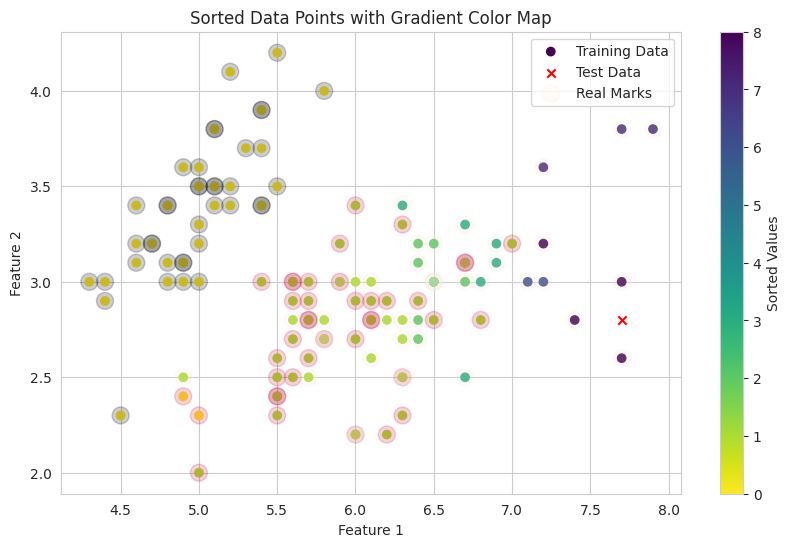

In [35]:
def plot_well_sim(x, X_train):
    # Extract sorted data points and sorted values
    sorted_indices, sorted_values = cluster_wrapper.predict([x])

    # Create a color gradient based on sorted values
    colors = sorted_values

    # Plot the sorted data points with a gradient color map
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_train[sorted_indices, 0], X_train[sorted_indices, 1], c=colors, cmap='viridis_r', label='Training Data')
    # Adjust color bar range to match the range of sorted values
    plt.colorbar(scatter, label='Sorted Values', ticks=np.arange(min(sorted_values), max(sorted_values)+1, 1))

    plt.scatter(x[0], x[1], c='red', marker='x', label='Test Data')
    plt.scatter(X_train[sorted_indices, 0], X_train[sorted_indices, 1], c=y_train[sorted_indices],label='Real Marks', s=150, alpha=0.2) 

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Sorted Data Points with Gradient Color Map')
    plt.legend()
    plt.grid(True)
    plt.show()

# plot the simular wells
plot_well_sim(X_test[19], X_train)


In [29]:
y_train

array([2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1,
       0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 2,
       1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 0,
       2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 0, 0, 1, 1,
       2, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 2, 1, 1, 2])